In [53]:
from tenLoader import TenRawset, TenVideoInfer
from DETR_model import DinoDetrMaskMul, DinoDETR, DinoDetrSimpleFuse
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import PIL.Image as Image
import numpy as np
from preprocess_utensils import get_gray_image, get_boundary_iou
import json
from loss import order_loss, chamer_distance_loss
import random
import time
import re

In [86]:
model_name = "DETR_100_mb"
loss_log_path = f"./log/{model_name}_loss.json"
iou_log_path = f"./log/{model_name}_iou.json"
test_iou_log_path = f"./log/{model_name}_test_iou.json"
model_path = f"./model/{model_name}.pth"
best_model_path = f"./model/{model_name}_best.pth"
log_path = f"./log/{model_name}.log"

In [87]:
dict_loss = {}
dict_iou = {}
test_dict_iou = {}
with open(loss_log_path, "r") as f:
    dict_loss = json.load(f)
with open(iou_log_path, "r") as f:
    dict_iou = json.load(f)
with open(test_iou_log_path, "r") as f:
    test_dict_iou = json.load(f)

In [88]:
numeric_dict_loss = {}
for key, value in dict_loss.items():
    numeric_dict_loss[int(key)] = float(value)
numeric_dict_iou = {}
for key, value in dict_iou.items():
    numeric_dict_iou[int(key)] = float(value)
numeric_test_dict_iou = {}
for key, value in test_dict_iou.items():
    numeric_test_dict_iou[int(key)] = float(value)
dict_loss = numeric_dict_loss
dict_iou = numeric_dict_iou
test_dict_iou = numeric_test_dict_iou

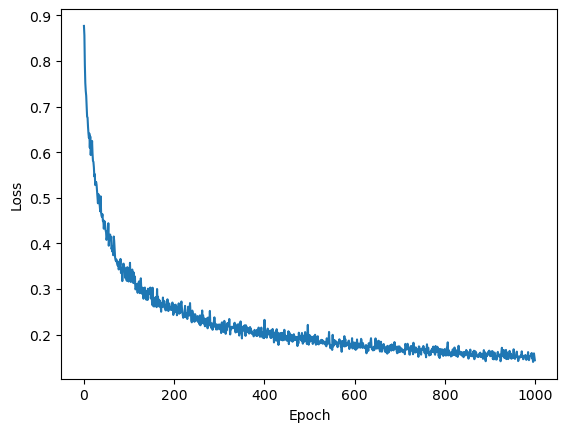

In [73]:
# plot the loss
plt.plot(list(dict_loss.keys()), list(dict_loss.values()))
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plot the update points
# plt.scatter(list(dict_iou.keys()), [dict_loss[i-1] for i in list(dict_iou.keys())], c="r", s=5)
plt.show()

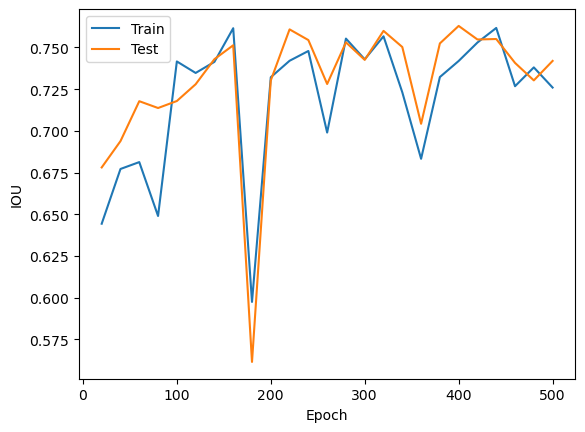

In [58]:
# plot the iou
plt.plot(
    list(dict_iou.keys()),
    list(dict_iou.values()),
    label="Train",
)
plt.plot(
    list(test_dict_iou.keys()),
    list(test_dict_iou.values()),
    label="Test",
)
plt.xlabel("Epoch")
plt.ylabel("IOU")
plt.legend()
plt.show()

In [61]:
# load model
best_model = DinoDetrMaskMul(mul_before=True).cuda()
# best_model = DinoDETR().cuda()
best_model.load_state_dict(torch.load(best_model_path))

Using cache found in /zhome/32/f/202284/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /zhome/32/f/202284/.cache/torch/hub/facebookresearch_dino_main


<All keys matched successfully>

In [89]:
# get last iou
list(test_dict_iou.values())[-1], list(dict_iou.values())[-1]

(0.7419451475143433, 0.7259711623191833)

In [90]:
# get the highest test iou
max(list(test_dict_iou.values()))

0.7629163861274719

In [64]:
testset = TenRawset(train=False)

model_infer = TenVideoInfer(testset, True)


In [65]:
model_infer.infer_model(best_model, 0)

In [66]:
model_infer.get_total_iou()

tensor(0.7629)

IoU: 0.842025101184845


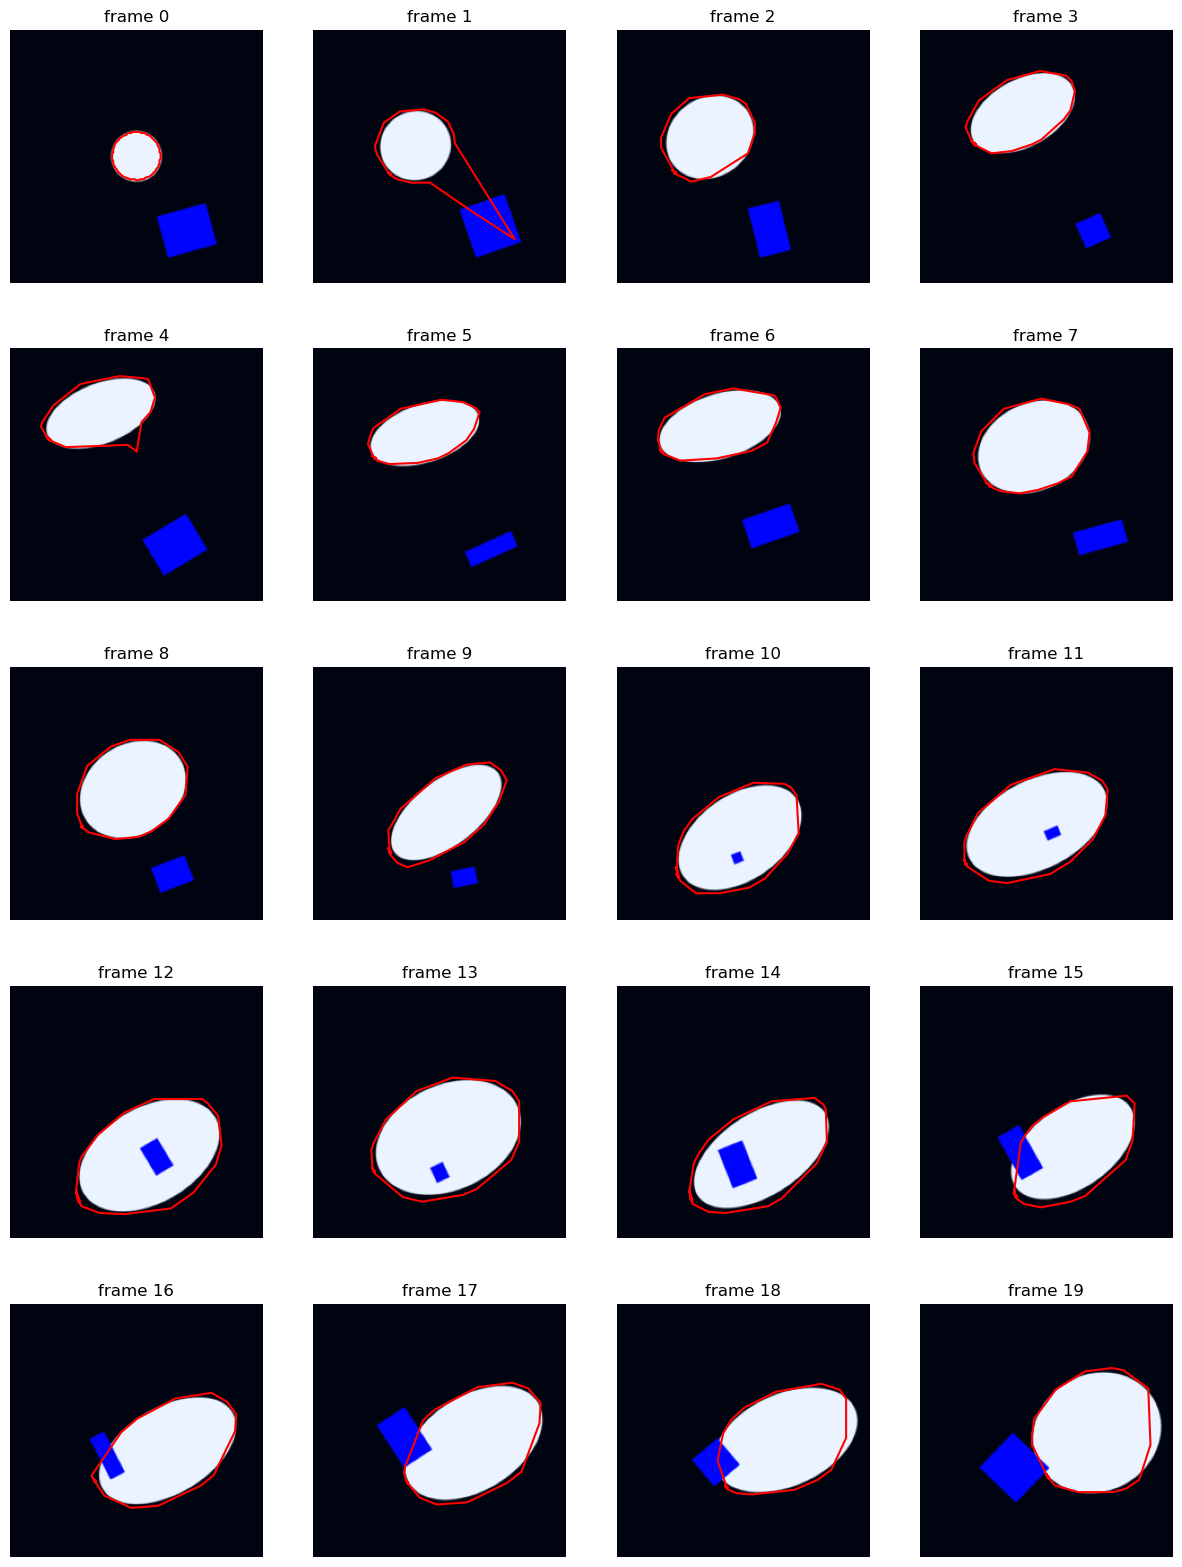

In [69]:
# video_idx = 0
# video_idx = 3
video_idx = 5
frame_idx = 0
print("IoU:", model_infer.get_video_iou(video_idx).item())
model_infer.show_infer_result(video_idx, 0)